In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# A/B Testing Simulation with Visualizations
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


CTR A: 0.084
CTR B: 0.138
t-statistic: -2.725
p-value (two-tailed): 0.0065
✅ Statistically significant difference.


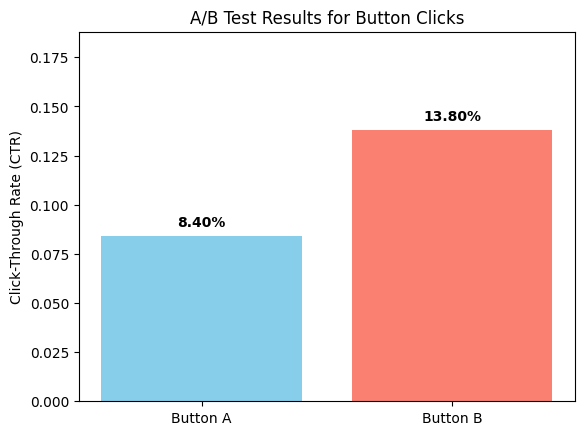

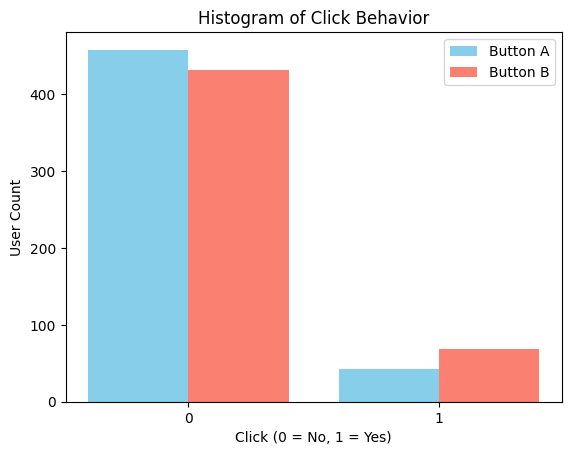

In [ ]:
# -----------------------------
# 1. Simulate Click Data
# -----------------------------
n_A, n_B = 500, 500
p_A, p_B = 0.10, 0.145  # True probabilities (unknown in real life)

clicks_A = np.random.binomial(1, p_A, n_A)
clicks_B = np.random.binomial(1, p_B, n_B)

# -----------------------------
# 3. T-test & CTR Calculation
# -----------------------------
ctr_A = clicks_A.mean()
ctr_B = clicks_B.mean()

# CLT Assumption happens here:
t_stat, p_value = ttest_ind(clicks_A, clicks_B)

print(f"CTR A: {ctr_A:.3f}")
print(f"CTR B: {ctr_B:.3f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value (two-tailed): {p_value:.4f}")
if p_value < 0.05:
    print("✅ Statistically significant difference.")
else:
    print("❌ No statistically significant difference.")

# -----------------------------
# 4. Bar Chart: CTR Comparison
# -----------------------------
labels = ['Button A', 'Button B']
ctr_values = [ctr_A, ctr_B]

plt.bar(labels, ctr_values, color=['skyblue', 'salmon'])
plt.ylabel('Click-Through Rate (CTR)')
plt.title('A/B Test Results for Button Clicks')
plt.ylim(0, max(ctr_values) + 0.05)

for i, v in enumerate(ctr_values):
    plt.text(i, v + 0.005, f'{v:.2%}', ha='center', fontweight='bold')

plt.show()

# -----------------------------
# 5. Histogram of Raw Clicks (0s and 1s)
# -----------------------------
plt.hist([clicks_A, clicks_B], bins=[-0.5, 0.5, 1.5], label=['Button A', 'Button B'],
         color=['skyblue', 'salmon'], rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel("Click (0 = No, 1 = Yes)")
plt.ylabel("User Count")
plt.title("Histogram of Click Behavior")
plt.legend()
plt.show()


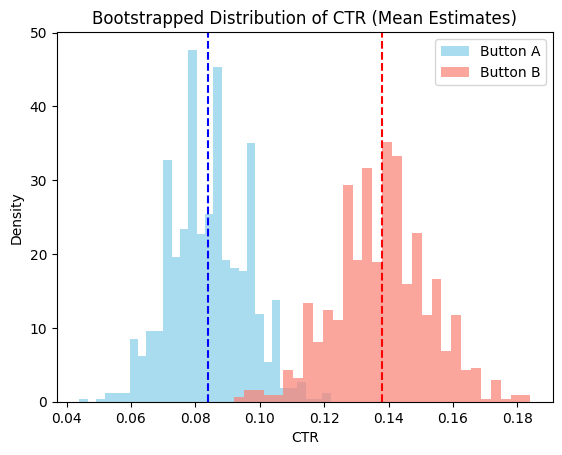

In [41]:
# -----------------------------
# 6. Bootstrapped Sampling Distributions of CTRs
# -----------------------------
def bootstrap_means(data, n_boot=1000):
    return [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_boot)]

boot_A = bootstrap_means(clicks_A)
boot_B = bootstrap_means(clicks_B)

plt.hist(boot_A, bins=30, alpha=0.7, label='Button A', color='skyblue', density=True)
plt.hist(boot_B, bins=30, alpha=0.7, label='Button B', color='salmon', density=True)
plt.axvline(ctr_A, color='blue', linestyle='dashed')
plt.axvline(ctr_B, color='red', linestyle='dashed')
plt.title('Bootstrapped Distribution of CTR (Mean Estimates)')
plt.xlabel('CTR')
plt.ylabel('Density')
plt.legend()
plt.show()

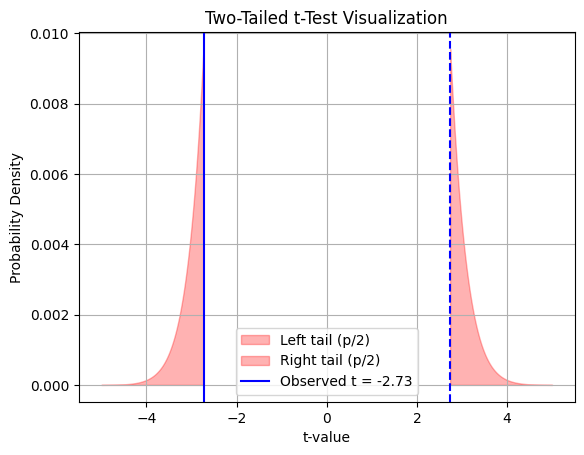

Observed t-statistic: -2.7254
Analytical p-value (two-tailed): 0.0065


In [43]:
from scipy.stats import ttest_ind, t
df = len(clicks_A) + len(clicks_B) - 2
# Create t-distribution values
x = np.linspace(-5, 5, 500)
y = t.pdf(x, df)


# Shade two-tailed p-value region
x_shade_left = x[x <= -np.abs(t_stat)]
x_shade_right = x[x >= np.abs(t_stat)]

plt.fill_between(x_shade_left, t.pdf(x_shade_left, df), color='red', alpha=0.3, label='Left tail (p/2)')
plt.fill_between(x_shade_right, t.pdf(x_shade_right, df), color='red', alpha=0.3, label='Right tail (p/2)')

# Mark the observed t-statistic
plt.axvline(t_stat, color='blue', linestyle='solid', label=f'Observed t = {t_stat:.2f}')
plt.axvline(-t_stat, color='blue', linestyle='dashed')

# Labels and legend
plt.title('Two-Tailed t-Test Visualization')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed t-statistic: {t_stat:.4f}")
print(f"Analytical p-value (two-tailed): {p_value:.4f}")

In [ ]:
# Two Tail - Area under both tails
# One Tail - Area under one tail
# One tail is easier to reject null hypothesis 

Nul hypothesis:
CTR A >= CTR B -> One tail

CTR A = CTR B -> Two tail